In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from google.colab import files
import io

from keras import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
np.random.seed(7)

In [168]:
dataset = files.upload()

Saving international-airline-passengers.csv to international-airline-passengers (3).csv


In [0]:
data = pd.read_csv(io.BytesIO(dataset['international-airline-passengers.csv']))
data = data.values


In [0]:
def create_dataset(a, w):
  dataX,dataY = [],[]
  for i in range(len(a)-w-1):
    dataX.append(a[i:i+w,0])
    dataY.append(a[i+w,0])
  return dataX,dataY

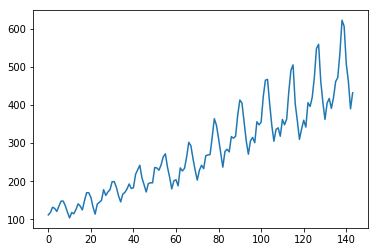

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 9         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
[112 118 132] 129
[118 132 129] 121
[132 129 121] 135
[129 121 135] 148
[121 135 148] 148
[135 148 148] 136
[148 148 136] 119
[148 136 119] 104
[136 119 104] 118
[119 104 118] 115


In [200]:
series = data[0:-1,1].reshape(len(data[0:-1,1]),1)
series = series.astype('int16')
window = 3

dataX,dataY = create_dataset(a=series, w=window)

dataX=np.array(dataX,dtype='int16')
dataY=np.array(dataY,dtype='int16')


'''X_train, X_test, y_train, y_test = train_test_split(dataX,dataY,test_size = 0.3)

X_train = np.array(X_train, dtype='int16')
y_train = np.array(y_train, dtype='int16')
X_test = np.array(X_test, dtype='int16')
y_test = np.array(y_test, dtype='int16')
'''

plt.plot(series)
plt.show()

model = Sequential()
model.add(Dense(8,input_dim=window,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.summary()


for i in range(10):
  print(dataX[i],dataY[i])
  


In [201]:
model.fit(dataX,dataY,epochs=200,batch_size=20,verbose=2)


Epoch 1/200
 - 1s - loss: 93865.8650 - acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 93865.8638 - acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 93865.8650 - acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 93865.8638 - acc: 0.0000e+00
Epoch 5/200
 - 0s - loss: 93865.8650 - acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 93865.8650 - acc: 0.0000e+00
Epoch 7/200
 - 0s - loss: 93865.8638 - acc: 0.0000e+00
Epoch 8/200
 - 0s - loss: 93865.8627 - acc: 0.0000e+00
Epoch 9/200
 - 0s - loss: 93865.8650 - acc: 0.0000e+00
Epoch 10/200
 - 0s - loss: 93865.8638 - acc: 0.0000e+00
Epoch 11/200
 - 0s - loss: 93865.8638 - acc: 0.0000e+00
Epoch 12/200
 - 0s - loss: 93865.8627 - acc: 0.0000e+00
Epoch 13/200
 - 0s - loss: 93865.8638 - acc: 0.0000e+00
Epoch 14/200
 - 0s - loss: 93865.8650 - acc: 0.0000e+00
Epoch 15/200
 - 0s - loss: 93865.8638 - acc: 0.0000e+00
Epoch 16/200
 - 0s - loss: 93865.8650 - acc: 0.0000e+00
Epoch 17/200
 - 0s - loss: 93865.8638 - acc: 0.0000e+00
Epoch 18/200
 - 0s - loss: 93865.8650 - acc: 0.0000e+00
E

RMSE : 295.7444607871964


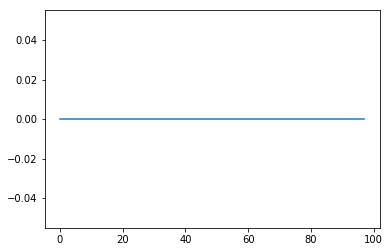

In [173]:
y = model.predict(X_train)
e = model.evaluate(X_test,y_test,verbose=0)
print('RMSE :',math.sqrt(e[0]))
plt.plot(y)
plt.show()